In [1]:
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder 
import matplotlib.pyplot as plt

In [2]:
# Check if CUDA is available
use_cuda = torch.cuda.is_available()
if not use_cuda:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [4]:
# Define hypterparameters
batch_size = 64
LR = 0.0001

full_dataset = ImageFolder('../data/raw/Taiwanese-Food-101', transform=transforms1)

# Data loaders
train_dataset = torch.load('../data/processed/Taiwanese-Food-101/train/train_dataset.pt')
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [7]:
# Check the shape of the data
images, labels = next(iter(train_loader))
print(f"Image batch shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

Image batch shape: torch.Size([64, 3, 224, 224])
Labels shape: torch.Size([64])


In [8]:
mean , std = torch.tensor([0.485, 0.456, 0.406]),torch.tensor([0.229, 0.224, 0.225])
transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])


def denormalize(image):
  image = transforms.Normalize(-mean/std,1/std)(image) #denormalize
  image = image.permute(1,2,0) #Changing from 3x224x224 to 224x224x3
  image = torch.clamp(image,0,1)
  return image

# helper function to un-normalize and display an image
def imshow(img):
    img = denormalize(img) 
    plt.imshow(img)

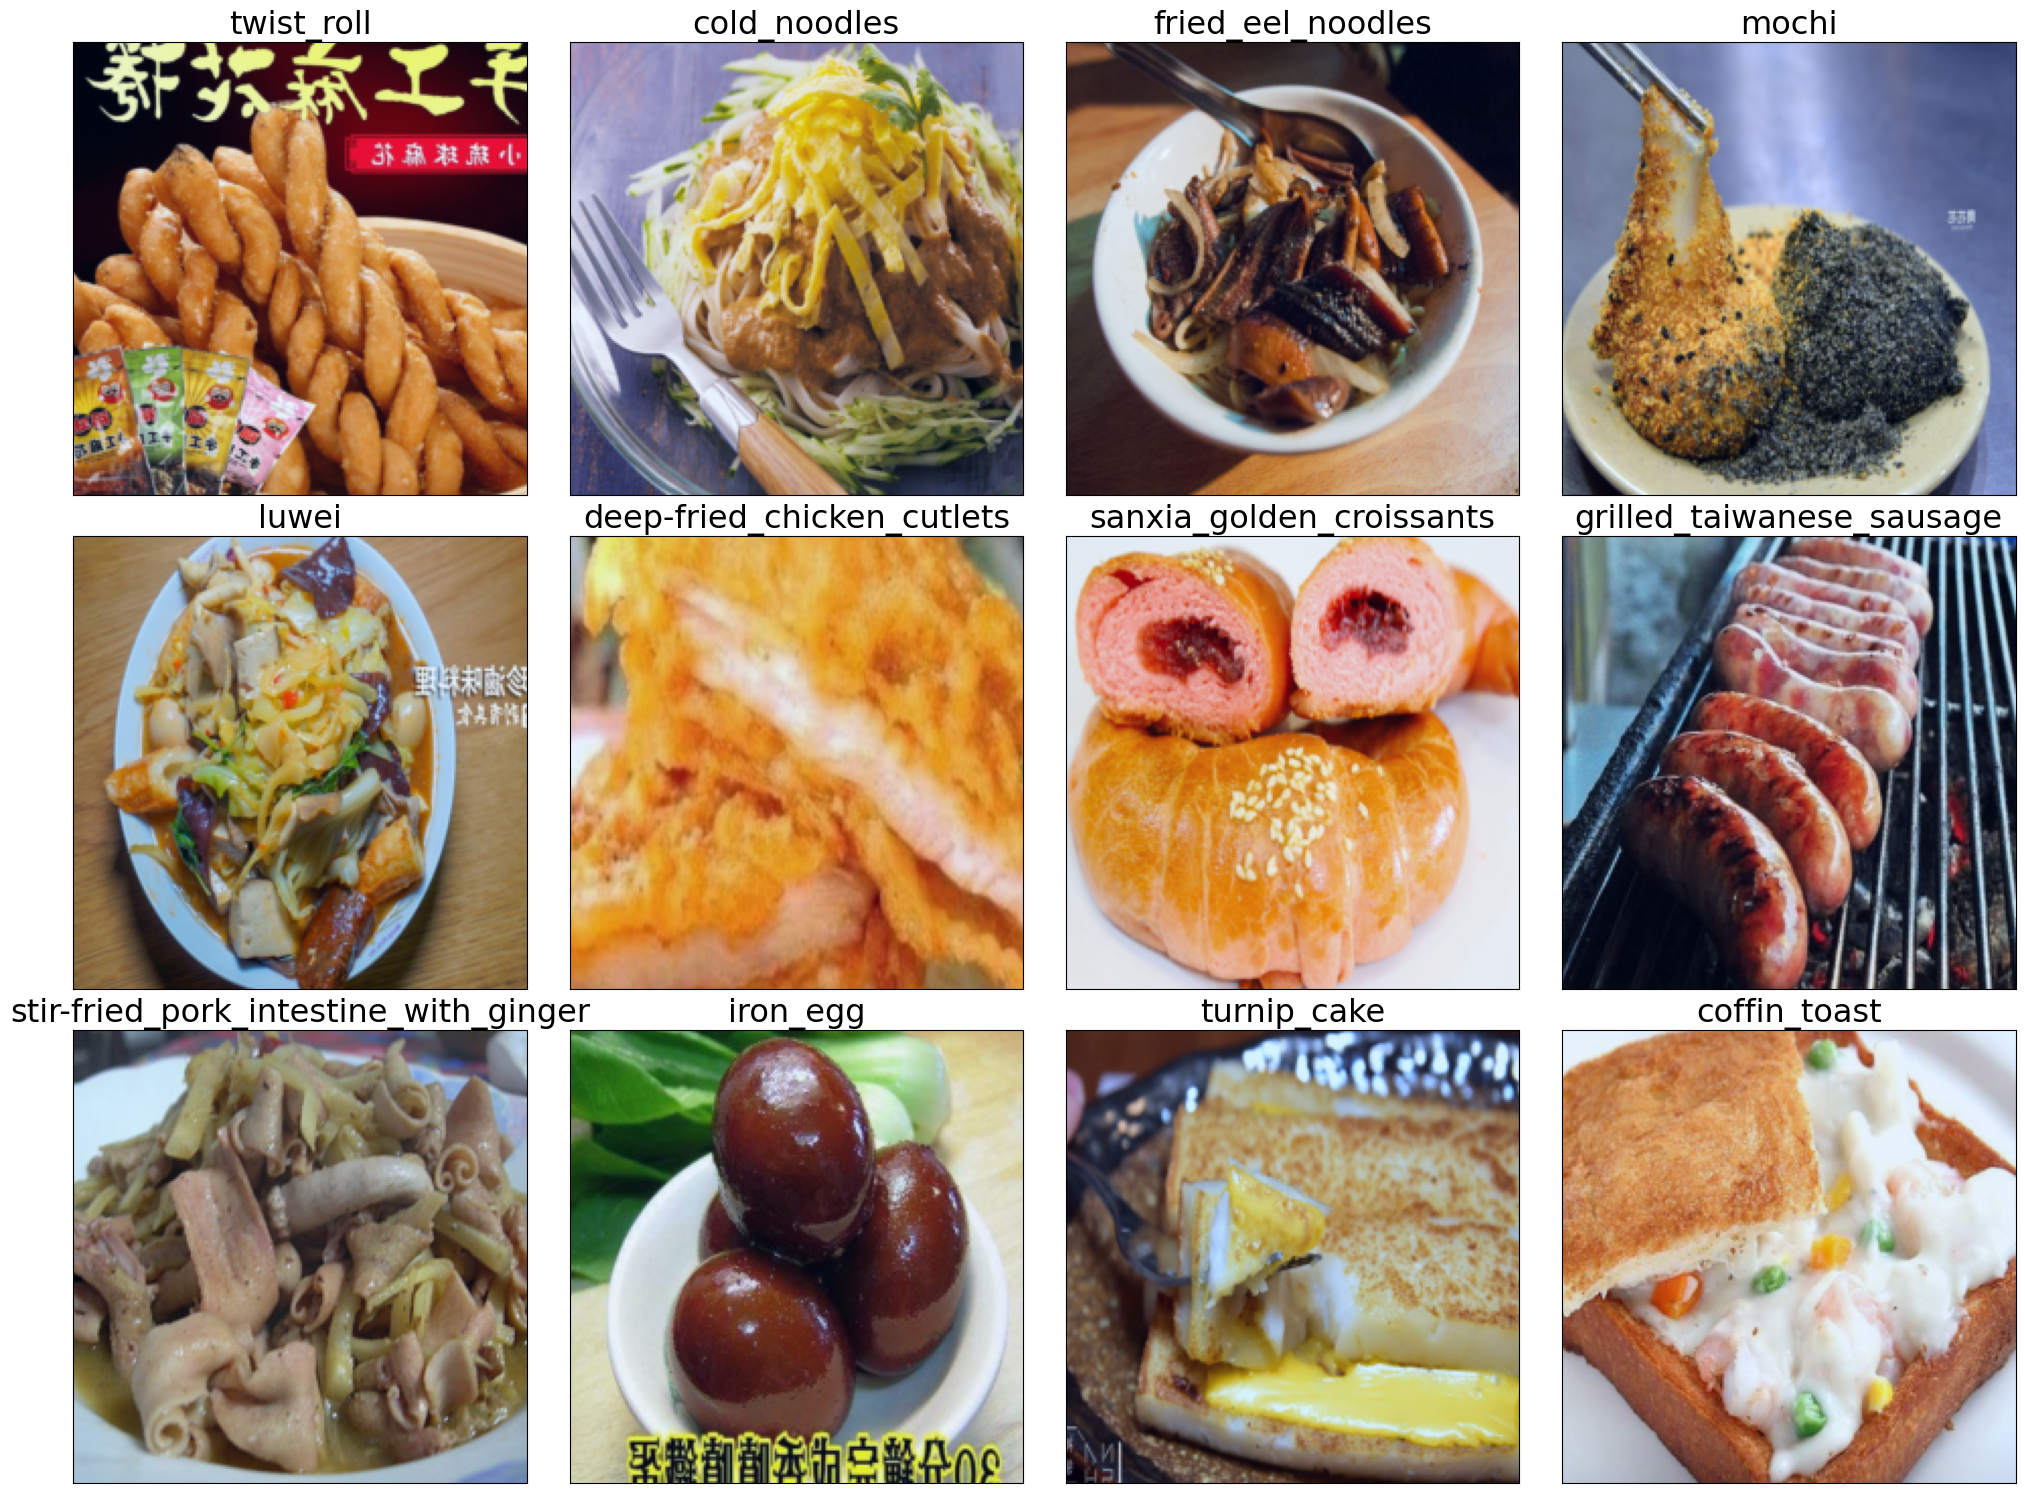

In [13]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Define the classes dictionary
classes = full_dataset.class_to_idx
# Invert the dictionary to map indices to food names
class_names = {v: k for k, v in classes.items()}

# Set the number of images per row and the total number of images to display
images_per_row = 4
num_images = min(len(images), 12)
num_rows = (num_images + images_per_row - 1) // images_per_row

# Create the figure with adjusted size
fig = plt.figure(figsize=(20, 5 * num_rows))

# Add more space between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for idx in range(num_images):
    ax = fig.add_subplot(num_rows, images_per_row, idx + 1, xticks=[], yticks=[])
    
    # Normalize the image data to [0, 1] range
    img = images[idx].permute(1, 2, 0)
    img = (img - img.min()) / (img.max() - img.min())
    
    ax.imshow(img)
    # Get the label index and convert to food name
    label_idx = labels[idx].item()
    label_text = class_names.get(label_idx, f"Unknown ({label_idx})")
    
    ax.set_title(label_text, fontsize=23, wrap=True)

plt.tight_layout()
plt.show()